<a href="https://colab.research.google.com/github/SantiagoMartinezHernandez/CVAI/blob/main/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's get familiar with the environment

Welcome to Google Colab, and on a general stand of view, to the Python Notebook: A code environment based on cells of code and markdowns.

Google Colab provides the opportunity to run code on the cloud and leverages the burden of installing dependencies on your computer while also letting you share the code easily with colleagues.

In my expirience Colab is the best option for code drafting and teaching, but it is not ideal for big projects and distributions (since it was not made for those purposes).


Regardless of the environment you choose, the Ipynb files work with Python on cells.

---
## Get to know the environment

The first thing to look are the cells, cells are independent blocks of code or text that shares memory with the environment. When you start a session (or begin a run of code of any Notebook) you'll start a Kernel.

Kernel refers to the runtime of your code, all the packages import, variables, classes and overall memory runs here. When the Kernel dies and needs to be restarted all the cells that you ran previously dissapear.

Since we are working on Colab, to our left you will find a widget with some great tools.

* The magnifying glass: for search and replace.
* the $\{x\}$: for variable inspector.
* the folder: for files uploading and dependencies validation.
* the $< >$: for code fragments that may accelerate development.
* the two line box: for command hints.
* the solid $>_$: for opening a terminal.

These tools may vary depending on the environment you use. But most of the IDE's have similar options.


In [ ]:
# First task: analize your env

"""
Open the variable inspector widget and then run this cell, pay attention to the
name, type, and shape of the data as it runs
"""

x = "CVAI"
y = [{"1":"dict_test"},1,True]
z = y[0]

In [ ]:
from types import NotImplementedType
# Seccond task: try some code

"""
Create a variable called 'W' that contains an array of 3 by 3 filled with zeros
then fill the second row with ones.

Check the result on variable inspector, don't forget to delete the Error raise
"""

import numpy as np

arr =  #Your solution
raise NotImplementedError
arr

[Click to check the solution](https://github.com/SantiagoMartinezHernandez/CVAI/blob/main/Notebooks/S1/Excercises/P1.txt)



## Get to know SKLearn

Scikit-learn (along with PyTorch and TensorFlow) are distributions for general ML and statistics.

SKLearn is a simple and efficient toolkit for data analysis that is widely known due to its ML implementations, you can do the following processes with industry quality performance:

* classification
* regression
* clustering
* Dimensionality reduction
* Model selection
* Preprocessing

And many more among those topics. Here's a link to the [SKLearn main page](https://scikit-learn.org/stable/), as per with every tool we would use on this course, the implementation is OpenSource and agrees with the MiT license.

In [1]:
# Before we start coding ML

"""
Google Colab terminal function is part of their Pro version, but we can
actually perform command prompt lines on code cells if the line is
preceeded by a '!' or a '%'

For example:
"""

!pip install -U scikit-learn

# While we are here we can install other fun dependencies

!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
# Make sure to restart the Kernel if new packages were installed, then run

!wget http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz

# A small version of an interesting dataset

--2023-07-23 01:59:35--  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243346528 (232M) [application/x-gzip]
Saving to: ‘lfw-funneled.tgz’

lfw-funneled.tgz    100%[===================>] 232.07M  2.69MB/s    in 1m 51s  

2023-07-23 02:01:26 (2.10 MB/s) - ‘lfw-funneled.tgz’ saved [243346528/243346528]



# Lets do something simple, how about an Face classifier?

As for todays' final excercise, we will create a SVM that would use a preprocessed fraction of the *Labeled Faces in the Wild* (LFW) to create a simple ML algorithm for face recognition with the help of SKLearn!

We will explore later on the course how does a Support Vector Machine works, but as for today lets use it to understand a little about an ML pipeline.

In [3]:
# First, let's start everything we need

from time import time # Measure the runtime
import matplotlib.pyplot as plt # Plot some results
from scipy.stats import loguniform # Logarithmic function with uniform distribution
from sklearn.datasets import fetch_lfw_people # A package for accessing the data we downloaded
from sklearn.decomposition import PCA # Principal Component Analysis, we'll look it up later
from sklearn.metrics import ConfusionMatrixDisplay, classification_report # Some Reports for our results!
from sklearn.model_selection import RandomizedSearchCV, train_test_split # Some tools for data uniform selection
from sklearn.preprocessing import StandardScaler # Standarization of the dataset
from sklearn.svm import SVC # Support Vector Machine Module

dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

samples, h, w = dataset.images.shape #Check the datatype on the variable inspector

"""
FIRST CONVENTION

We denote 'X' or Big x to the dataset features, this notation derives from
statistics, where the X is used as the set of data that corresponds to
regressors. X is all the information you need to get a result.

'y' corresponds to the labels, or the expected result
"""

X = dataset.data
n_features = X.shape[1]
y = dataset.target
target_names = dataset.target_names

#Optimal processing usually transforms the labels, so instead of Jhon and
# Sussan we use 0 and 1, and so on.

n_classes = target_names.shape

#Lets print some initial insights!

In [ ]:
# Print the number of features, samples and classes on our dataset
print("Our Dataset")
raise NotImplementedError("Print the results")

[Click to see the solution](https://github.com/SantiagoMartinezHernandez/CVAI/blob/main/Notebooks/S1/Excercises/P2.txt)

Too easy? let's begin with the actual ML

In [4]:
"""
SECOND CONVENTION

When training a model we need to have your dataset split in
train and test.

It is common for the propotion to be 70-30 on train and test respectively.
But up to 85% training work as well.

You will found that many of the algorithms of ML uses random states
to begin. To be able to recreate accurate results we use seeds.

A seed is a set value from which the function performs its operation
on a static way. The convention in industry is the number 42.

The reason? no idea, but 42 is the answer to anything in the universe.
"""

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

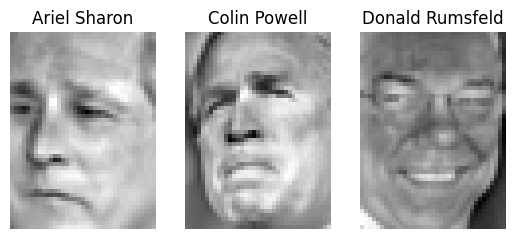

In [ ]:
#Why don't we look at some data? plot 3 random faces from the dataset
#Help yourself with h and w , X data is flattened!

import numpy as np

raise NotImplementedError

[click to see the solution](https://github.com/SantiagoMartinezHernandez/CVAI/blob/main/Notebooks/S1/Excercises/P3.txt)

In [5]:
#Cool! now lets create a latent space

"""
We will talk about it later, but a latent space is an algebraic set
in which information has a lower dimensionallity compared to the input
of the transformation function.

We will hard-code this one by performing a PCA, we will also cover
this on future lessons.
"""
K = 150 #number of components
pca = PCA(n_components=K, svd_solver="randomized",whiten=True).fit(X_train)

eigenFaces = pca.components_.reshape((K,h,w))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [12]:
#Lets create our very first ablation experiment

params = {"C":loguniform(1e3,1e5), "gamma":loguniform(1e-4,1e-1)}
clf = RandomizedSearchCV(SVC(kernel="rbf",class_weight="balanced"),params,n_iter=10)
clf = clf.fit(X_train_pca,y_train)
clf.best_estimator_

SVC(C=2570.495783203366, class_weight='balanced', gamma=0.003892036610102612)

                   precision    recall  f1-score   support

     Ariel Sharon       0.82      0.69      0.75        13
     Colin Powell       0.76      0.92      0.83        60
  Donald Rumsfeld       0.89      0.59      0.71        27
    George W Bush       0.89      0.97      0.93       146
Gerhard Schroeder       0.91      0.80      0.85        25
      Hugo Chavez       0.80      0.53      0.64        15
       Tony Blair       0.94      0.81      0.87        36

         accuracy                           0.86       322
        macro avg       0.86      0.76      0.80       322
     weighted avg       0.87      0.86      0.86       322



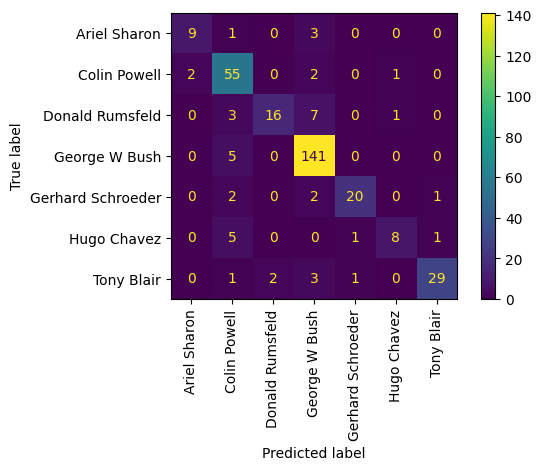

In [16]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test,y_pred,target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf,X_test_pca,y_test, display_labels=target_names,xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

Answer the following questions:
* What can we infer from these results?
* is it a good model?
* How can we upgrade it?
* What would we require to create a personalized model?

[Click to see the solution](https://)

# That is it for today!

Hopefully now you see what kind of learning waits ahead.

Feel free to leave questions on the course chanels or Github. You can also send a DM to my contact.

### *A challenge for you*

We discussed that, theoretically, we can create a personalized classifier of faces. How about you do it? add yourself as a new class to the model.

*CVAI: Fundamentals of artificial intelligence for computer vision* is a non-profit project created by Andrés Santiago Martínez in which all files and code are under OpenSource agreements. The materials of the course are available for external use as long as the author is previously notified to its use.